# Tarefa 03 - Grupo 03
1. Disciplina: Data Analytics Hands-on
2. Integrantes:

*   Leandro Ariel Caputo
*   Matheus Oliveira
*   Loyanne Cristina Lemos Rabelo
*   Victor Miranda Bulhosa


###Criação e análise de regressão linear simples e múltipla


Fonte: https://medium.com/better-programming/data-science-modeling-how-to-use-linear-regression-with-python-fdf6ca5481be

Base: https://www.kaggle.com/kumarajarshi/life-expectancy-who

Atributos:

- Country: país
- Year: ano
- Status:
  - Developed = desenvolvido
  - Developing = em desenvolvimento
- Life expectancy: expectativa de vida
- Adult Mortality: taxa de mortalidade de adultos a cada 1000 habitantes
- Infant deaths: mortes de crianças a cada 1000 habitantes
- Alcohol: consumo de álcool em litros
- Percentage expenditure: % do PIB per capita utilizada para saúde
- Hepatitis B: cobertura de imunização entre crianças com 1 ano de idade
- Measles: número de casos de sarampo reportados a cada 1000 habitantes
- BMI: média do IMC da população
- Under-five deaths: número de mortes de crianças abaixo de 5 anos a cada 1000 habitantes
- Polio: cobertura de imunização entre crianças com 1 ano de idade
- Total expenditure: % de gastos do governo em saúde, em relação ao total de gastos
- Diphtheria: cobertura de imunização entre crianças com 1 ano de idade
- HIV/AIDS: mortes a cada 1000 nascidos vivos
- GDP: PIB
- Population: população
- Thinness 1-19 years: porcentagem de jovens de 10 a 19 anos em desnutrição
- Thinness 5-9 years: porcentagem de jovens de 5 a 9 anos em desnutrição
- Income composition: IDH em termos de recursos
- Schooling: número de anos de escolaridade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

df = pd.read_csv("Life Expectancy Data.csv", sep = ",")

#EXPLORAÇÃO DOS DADOS

In [ ]:
# Backup
df_EDA = df.copy()

In [ ]:
df_EDA.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Ajustando nomes das colunas
df_EDA.columns = df_EDA.columns.str.lower()
df_EDA.columns = ['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  polio               

Os atributos life_expectancy, adult_mortality, alcohol, hepatitis_b, bmi, polio, total_expenditure, diphtheria, gdp, population, thinness_1_19_years, thinness_5_9_years, income_composition_of_resources e schooling possuem dados faltantes.

Os atributos infant_deaths, percentage_expenditure, measles e under_five_deaths possuem valores que são discrepantes, e deverão ser tratados.
* infant_deaths, measles e under_five_deaths: valores acima de 1000
* percentage_expenditure: valores acima de 100%


In [ ]:
print("infant_deaths")
display(df_EDA[df_EDA['infant_deaths'] > 1000])
print('\n measles')
display(df_EDA[df_EDA['measles'] > 1000])
print('\n under_five_deaths')
display(df_EDA[df_EDA['under_five_deaths'] > 1000])
print('\n percentage_expenditure')
display(df_EDA[df_EDA['percentage_expenditure'] > 100])

infant_deaths


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,15.9,1600,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,14.9,1800,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,14.4,1900,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1196,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,13.5,2000,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1197,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.0,55443,13.0,2100,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1198,India,2003,Developing,63.7,216.0,1700,1.19,19.480868,NaN,47147,12.6,2200,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6



 measles


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,29.4,44,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0



 under_five_deaths


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,18.7,1100,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,18.1,1200,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,17.5,1300,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,15.9,1600,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,14.9,1800,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,14.4,1900,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7



 percentage_expenditure


,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,56.5,1,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,Zambia,2011,Developing,58.2,366.0,29,2.57,183.046170,81.0,13234,21.2,44,83.0,4.26,81.0,6.3,1644.619672,14264756.0,6.6,6.4,0.543,12.0
2911,Zambia,2010,Developing,58.0,363.0,30,2.47,184.364910,83.0,15754,2.7,45,8.0,4.41,83.0,6.8,1463.213573,138533.0,6.7,6.5,0.533,11.8
2912,Zambia,2009,Developing,57.4,368.0,30,2.30,143.869887,94.0,26,2.2,47,93.0,4.73,94.0,9.1,1139.112330,13456417.0,6.7,6.6,0.518,11.6
2913,Zambia,2008,Developing,55.7,45.0,31,2.12,153.678375,87.0,140,19.7,49,9.0,4.87,87.0,11.9,1369.682490,1382517.0,6.8,6.7,0.504,11.4


Os valores do atributo infant_deaths e under_five_deaths acima de 1000 correspondem somente a India. Por enquanto, esses valores serão mantidos, e seguiremos a análise tendo em mente esse risco. Os dados apresentados nesse dataset possuem incongruências de diversas ordens, como valores que estão foram da faixa permitida ou da faixa esperada.

In [ ]:
display(df_EDA[df_EDA['country'] == "India"])

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
1186,India,2015,Developing,68.3,181.0,910,NaN,0.000000,87.0,90387,18.7,1100,86.0,NaN,87.0,0.2,1613.188780,1.395398e+06,26.7,27.3,0.615,11.6
1187,India,2014,Developing,68.0,184.0,957,3.07,86.521539,79.0,79563,18.1,1200,84.0,4.69,85.0,0.2,1573.118890,1.293859e+09,26.8,27.4,0.607,11.6
1188,India,2013,Developing,67.6,187.0,1000,3.11,67.672304,7.0,13822,17.5,1300,82.0,4.53,83.0,0.2,1452.195373,1.278562e+08,26.8,27.5,0.599,11.5
1189,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,17.0,1400,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1190,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,16.4,1500,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1191,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,15.9,1600,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1192,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,15.4,1700,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1193,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,14.9,1800,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1194,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,14.4,1900,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1195,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,13.9,2000,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7


In [ ]:
# Backup para tratar os dados - substituindo valores nulos pelas medianas dos atributos, por país
df_backup = df_EDA.copy()
df_backup

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
# Substituindo os valores nulos dos atributos numéricos pelas respectivas medianas, por país
import math

atributos = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

for pais in df_backup.country.unique():
    for atributo in atributos:
        df_backup.loc[(df_backup.country == pais), atributo] = df_backup.loc[(df_backup.country == pais), atributo].apply(lambda x: df_backup.loc[(df_backup.country == pais), atributo].dropna().median() if math.isnan(x) else x)

In [ ]:
# Verificando se ainda há valores nulos
df_backup.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                             17
percentage_expenditure               0
hepatitis_b                        144
measles                              0
bmi                                 34
under_five_deaths                    0
polio                                0
total_expenditure                   32
diphtheria                           0
hiv_aids                             0
gdp                                405
population                         648
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

Ainda há presença de valores nulos nos países onde não foi possível calcular as respectivas medianas. Isso ocorre nos países em que todas as medições são nulas.

In [ ]:
# Não faz sentido termos valores nulos no target, então vamos dropar os registros (10 ao todo)
df_backup = df_backup[df_backup['life_expectancy'].notna()]

In [ ]:
# Verificando alterações
df_backup.isnull().sum()

country                              0
year                                 0
status                               0
life_expectancy                      0
adult_mortality                      0
infant_deaths                        0
alcohol                             16
percentage_expenditure               0
hepatitis_b                        144
measles                              0
bmi                                 32
under_five_deaths                    0
polio                                0
total_expenditure                   32
diphtheria                           0
hiv_aids                             0
gdp                                400
population                         640
thinness_1_19_years                 32
thinness_5_9_years                  32
income_composition_of_resources    160
schooling                          160
dtype: int64

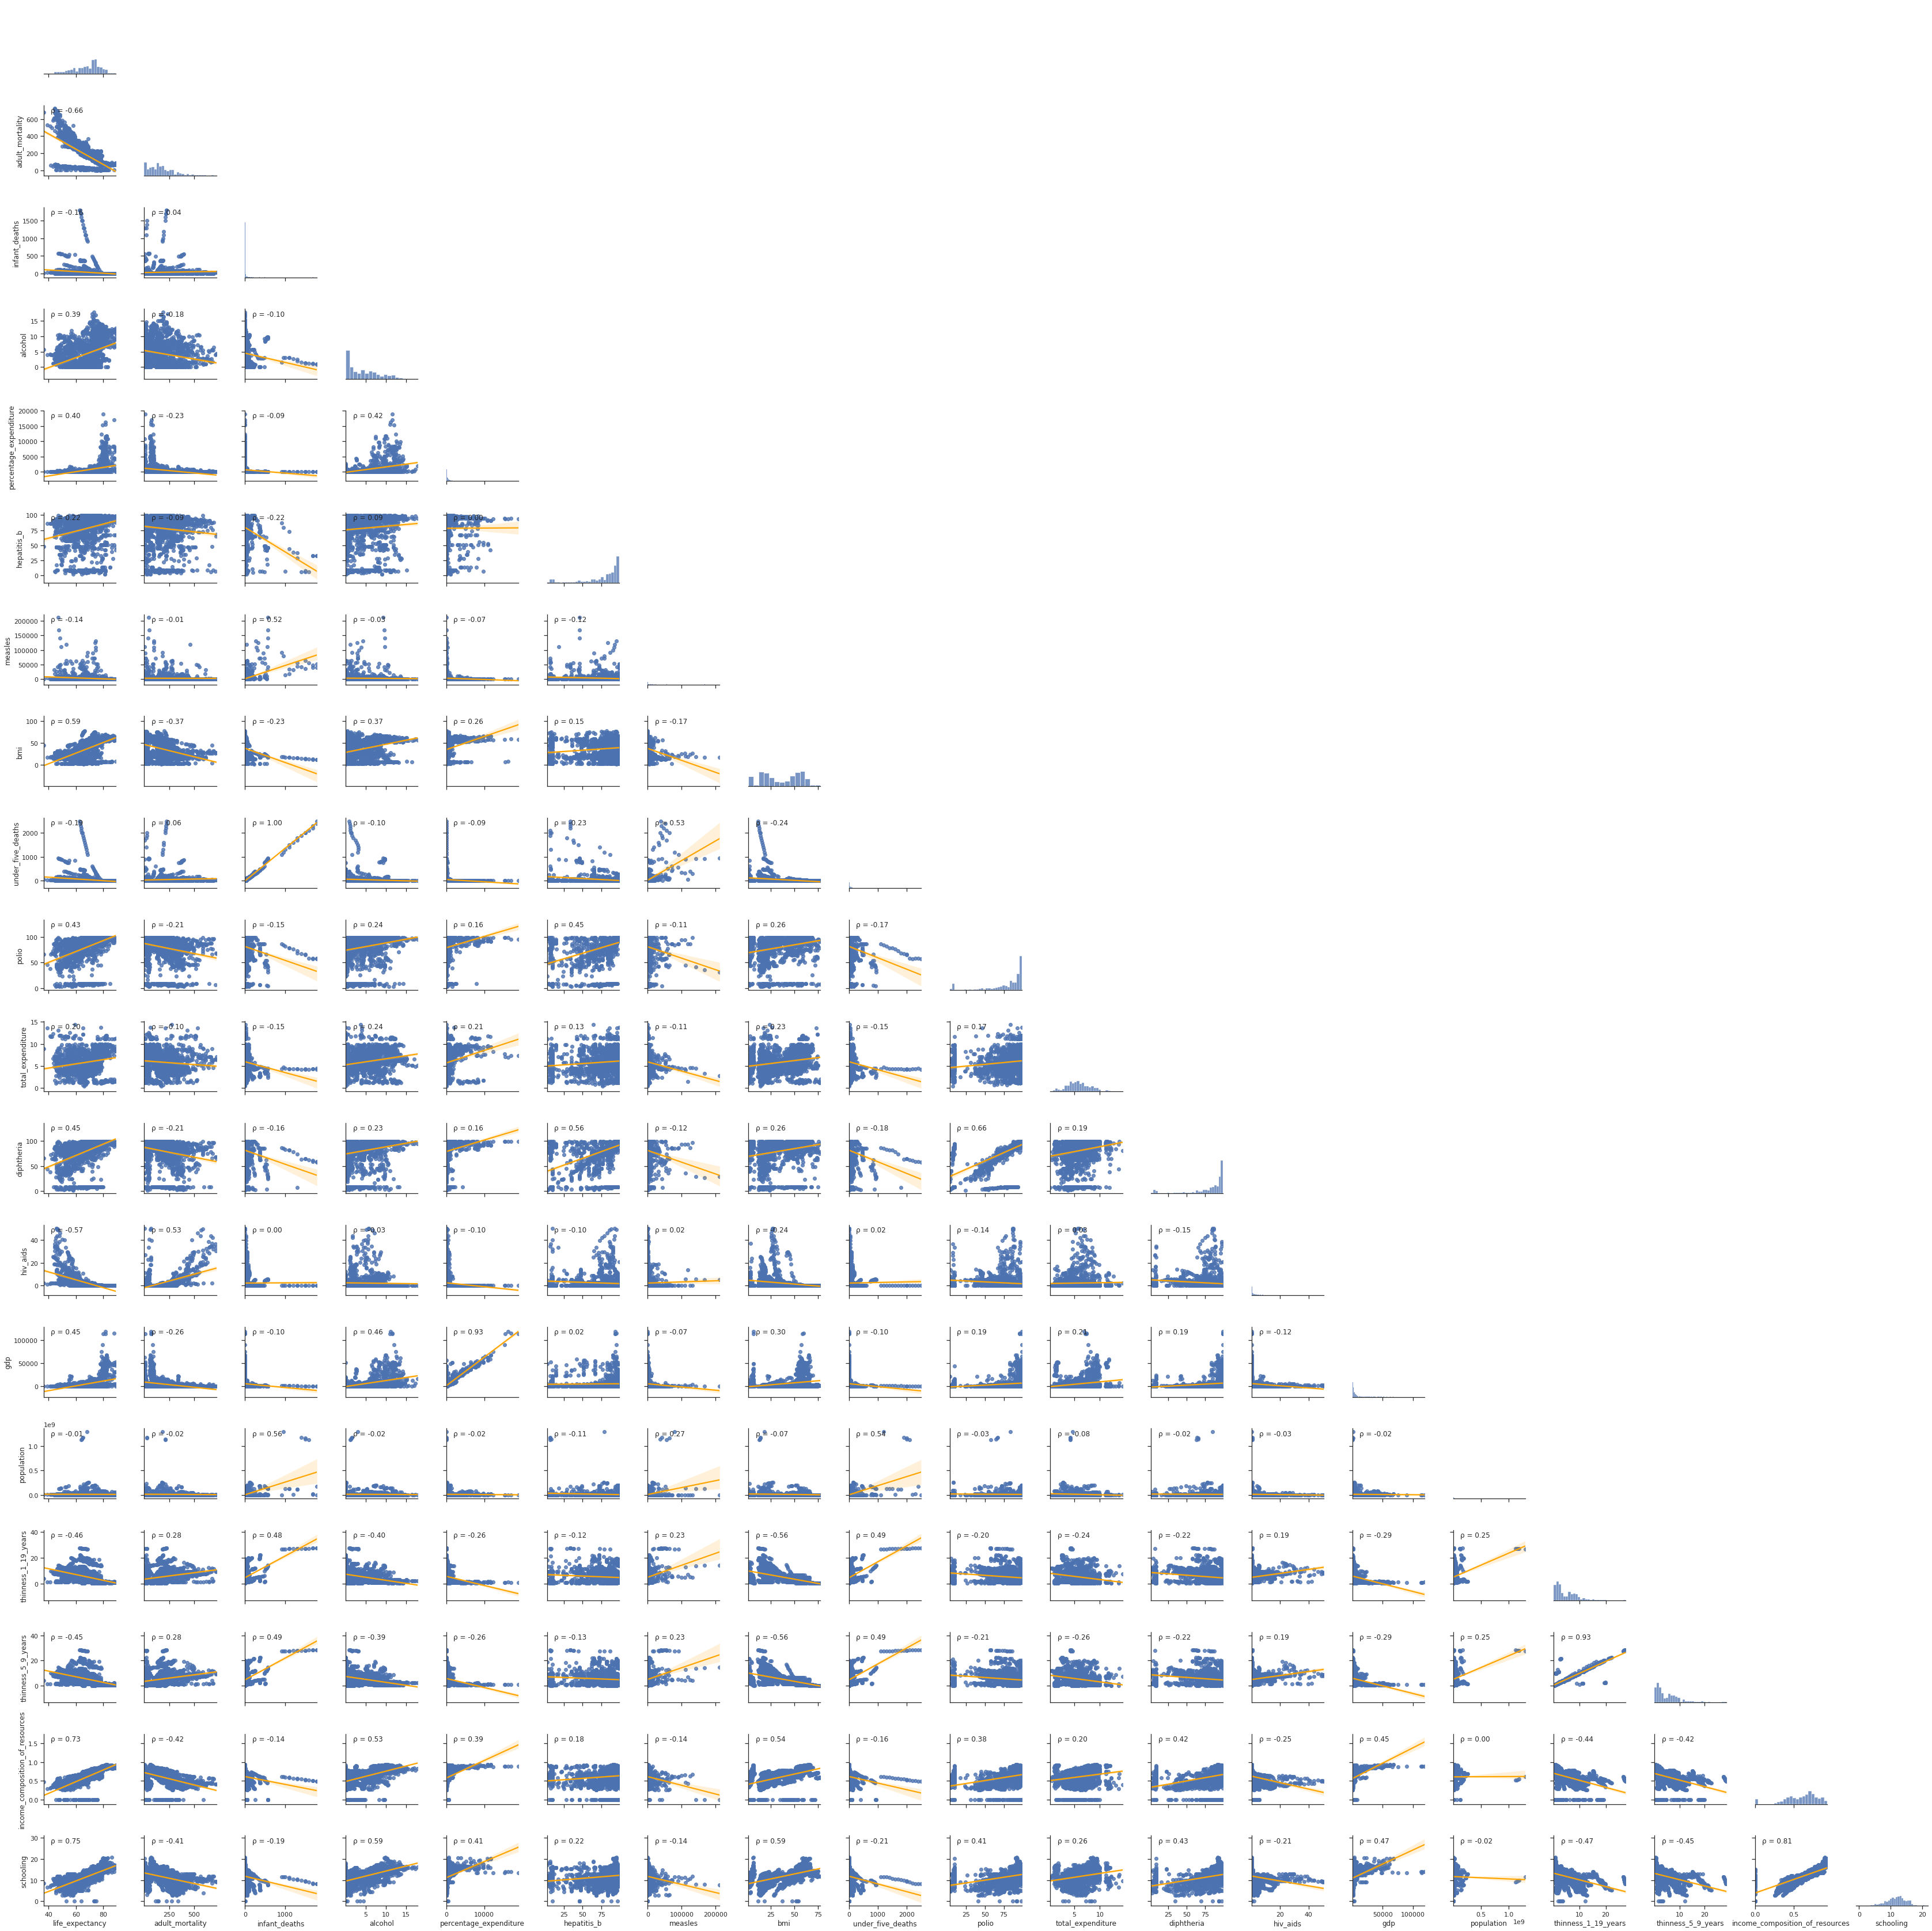

In [ ]:
# Fazer correlação para verificar se mais atributos podem ser dropados

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

%config InlineBackend.figure_format = 'png'
sns.pairplot(df_backup[atributos].dropna(), kind = "reg", corner = True, plot_kws={'line_kws':{'color':'orange'}}).map_lower(corrfunc);

Os atributos income_composition_of_resources e schooling apresentam correlação forte com o target.

Os atributos infant_deaths e under_five_deaths possuem uma correlação aproximadamente igual a 1, logo podemos dropar o atributo under_five_deaths, que pela faixa de idade deve estar contido no atributo infant_deaths. O mesmo acontece entre os atributos thinness_1_19_years e thinness_5_9_years. Iremos manter o thinness_5_9_years por conta da desnutrição ser mais crítica na infância.

O atributo population, que possui a maior quantidade de dados faltantes após o tratamento inicial realizado, possui correlação fraca com o target. Por conta disso, este atributo será dropado.



In [ ]:
# Dropando colunas
df_backup.drop(columns=['under_five_deaths','thinness_1_19_years', 'population'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#Distribuição das variáveis categóricas
categoricas = ['country', 'status']
for c in categoricas:
    print ("---- %s ----" % c)
    print (df_backup[c].value_counts())
    print('\n')

---- country ----
Germany        16
Qatar          16
Saint Lucia    16
Oman           16
Niger          16
               ..
Indonesia      16
Bahamas        16
Costa Rica     16
Georgia        16
Switzerland    16
Name: country, Length: 183, dtype: int64


---- status ----
Developing    2416
Developed      512
Name: status, dtype: int64




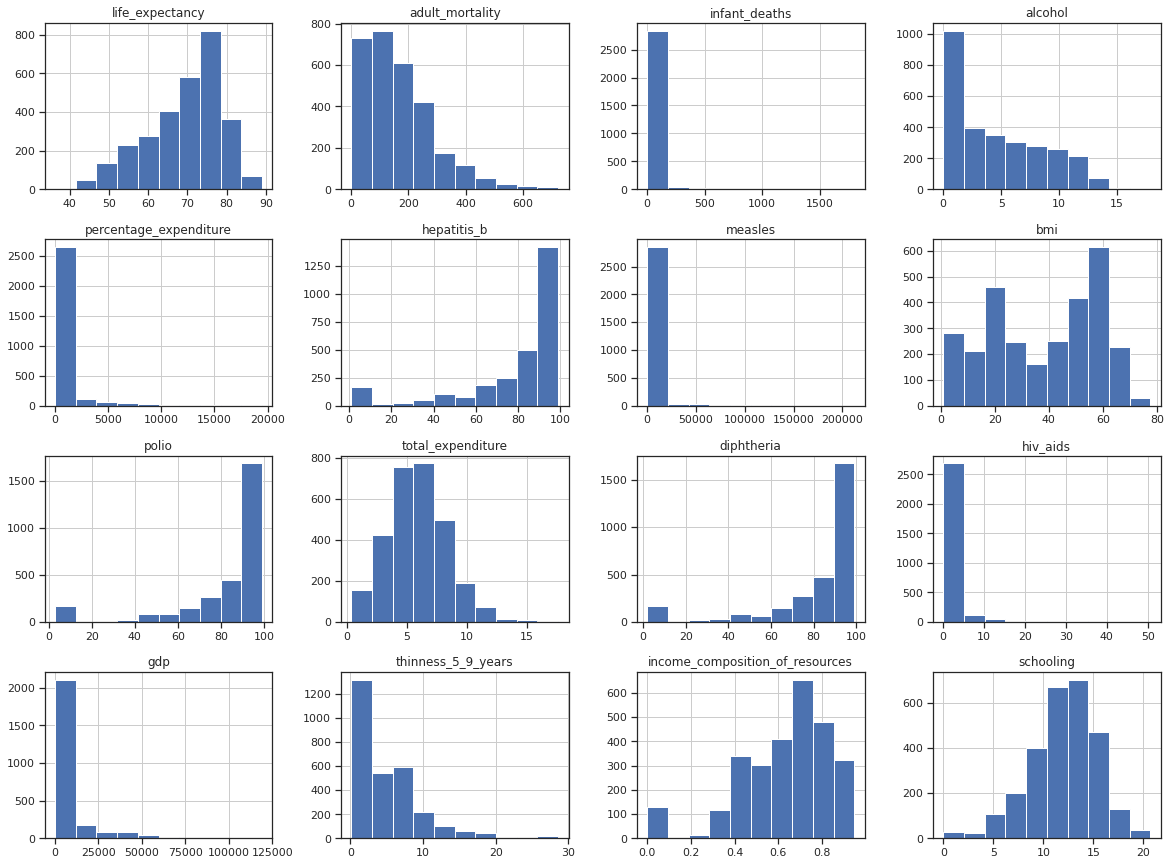

In [ ]:
# Histogramas
numericos = ['life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling']

df_backup[numericos].hist(figsize=(20, 15));

In [ ]:
# Teste de normalidade - Shapiro
from scipy import stats
for x in numericos:
    pvalor = stats.shapiro(df_backup[x])[1]
    if (pvalor > 0.05):
        print(f'{x} SEGUE distribuição normal, pois o p-valor igual a {pvalor:.2e}')
    else:
        print(f'{x} não segue distribuição normal, pois o p-valor igual a {pvalor:.2e}')

life_expectancy não segue distribuição normal, pois o p-valor igual a 7.40e-29
adult_mortality não segue distribuição normal, pois o p-valor igual a 1.93e-37
infant_deaths não segue distribuição normal, pois o p-valor igual a 0.00e+00
alcohol SEGUE distribuição normal, pois o p-valor igual a 1.00e+00
percentage_expenditure não segue distribuição normal, pois o p-valor igual a 0.00e+00
hepatitis_b SEGUE distribuição normal, pois o p-valor igual a 1.00e+00
measles não segue distribuição normal, pois o p-valor igual a 0.00e+00
bmi SEGUE distribuição normal, pois o p-valor igual a 1.00e+00
polio não segue distribuição normal, pois o p-valor igual a 0.00e+00
total_expenditure SEGUE distribuição normal, pois o p-valor igual a 1.00e+00
diphtheria não segue distribuição normal, pois o p-valor igual a 0.00e+00
hiv_aids não segue distribuição normal, pois o p-valor igual a 0.00e+00
gdp SEGUE distribuição normal, pois o p-valor igual a 1.00e+00
thinness_5_9_years SEGUE distribuição normal, pois o

###Observações evidentes:

Os atributos alcohol, hepatitis_b, bmi, total_expenditure, gdp, thinness_5_9_years, income_composition_of_resources e schooling seguem distribuição normal.

Schooling, income_composition_of_resources e adult_mortality foram os atributos que apresentaram correlação forte (módulo maior que 0,7) com o target.

Existem atributos, como meales e infant_death, que possuem grande concentração de dados no primeiro bin do histograma, evidenciando possíveis outliers.





###Correlação das variáveis com o target

In [ ]:
df_EDA = df_backup.copy()

In [ ]:
#correlação das variáveis com o target
df_EDA[df_EDA.columns].corr()['life_expectancy'][:]

year                               0.170033
life_expectancy                    1.000000
adult_mortality                   -0.696359
infant_deaths                     -0.196557
alcohol                            0.406934
percentage_expenditure             0.381864
hepatitis_b                        0.288081
measles                           -0.157586
bmi                                0.567694
polio                              0.471586
total_expenditure                  0.228399
diphtheria                         0.485097
hiv_aids                          -0.556556
gdp                                0.461766
thinness_5_9_years                -0.471584
income_composition_of_resources    0.724776
schooling                          0.751975
Name: life_expectancy, dtype: float64

É notório que os atributos adult_mortality, income_composition_of_resources e schooling são os mais correlacionados com o target (life_expectancy).

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.03, 'Life_expectancy vs. adult_mortality, income_composition_of_resources, and schooling')

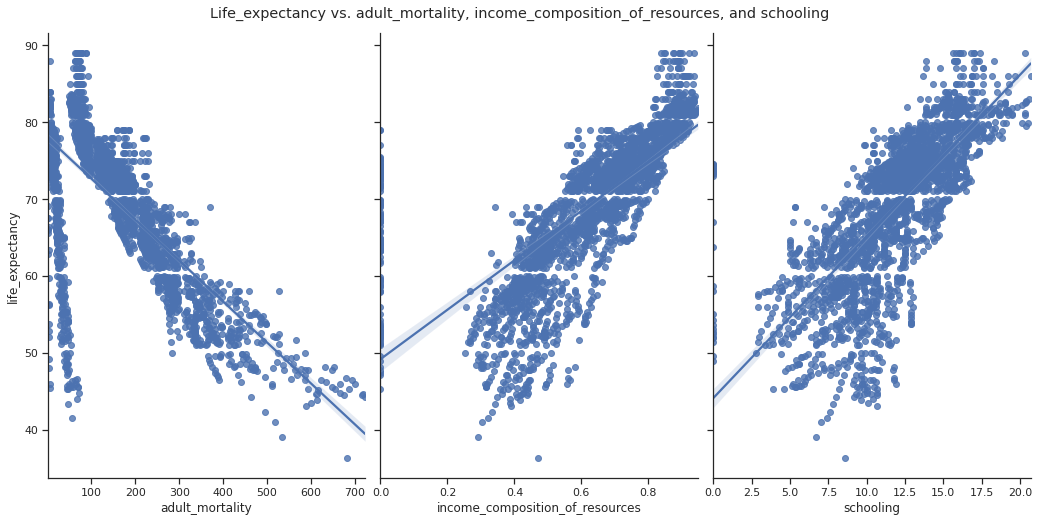

In [ ]:
# visualizando relacionamentos entre os três preditores selecionados e o target

ax_3pairs = sns.pairplot(df_EDA, x_vars=['adult_mortality','income_composition_of_resources','schooling'],
                         y_vars='life_expectancy', size=7, aspect=0.7, kind='reg')

ax_3pairs.fig.suptitle('Life_expectancy vs. adult_mortality, income_composition_of_resources, and schooling', y=1.03)

#Regressão Linear Simples

##Análise de resíduos

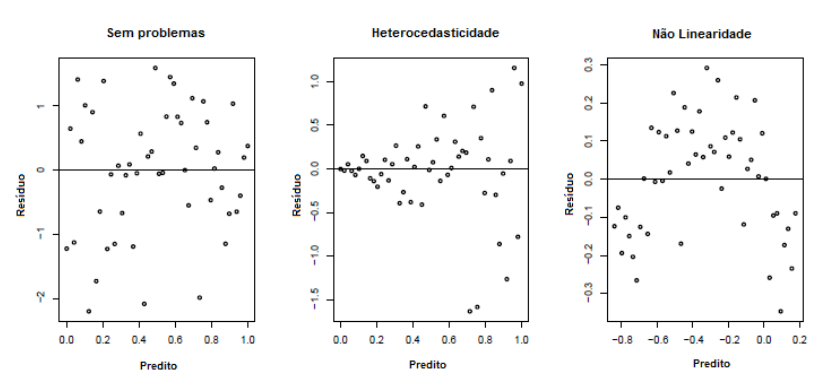

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Life_expectancy VS. schooling')

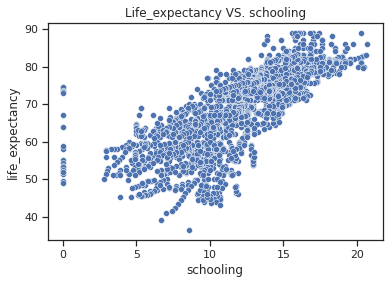

In [ ]:
# Scatterplot life_expentancy x schooling
ax_scatter = sns.scatterplot(df_EDA['schooling'], df_EDA['life_expectancy'])
ax_scatter.set_title("Life_expectancy VS. schooling")

Para verificar se o relacionamento é, de fato, linear, podemos plotar os resíduos de nosso modelo em um gráfico e procurar por padrões. Um padrão claro entre os resíduos pode sugerir que outro modelo, como um quadrático ou logarítmico, pode descrever melhor a relação entre as duas variáveis. Vamos verificar os resíduos da relação life_expectancy vs. schooling:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, ' Life_expectancy vs. schooling Residual Plot')

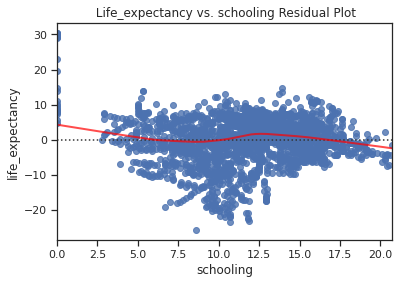

In [ ]:
# Gráfico de resíduos entre life_expectancy e schooling
ax_residual = sns.residplot(df_EDA['schooling'], df_EDA['life_expectancy'], lowess=True, color="b", line_kws={'color': 'red', 'lw': 2, 'alpha': 0.7})
ax_residual.set_title(" Life_expectancy vs. schooling Residual Plot")

Não há um padrão claro entre os resíduos. Sendo assim, temos um indício de que a regressão linear entre esses dois atributos pode ser útil.


Gerando modelo de regressão:

In [ ]:
# Verificando se os 160 NaN do atributo schooling correspondem aos mesmos 160 NaN do atributo income_composition_of_resources
df_EDA[df_EDA['schooling'].isnull()].income_composition_of_resources.isnull().sum()

160

In [ ]:
# Como os mesmos registros possuem atributos schooling e income_composition_of_resources como NaN, vamos excluir esses registros
df_EDA = df_EDA[df_EDA['schooling'].notna()]

In [ ]:
# Modelo de regressão com apenas uma variável independente
import scipy

model1 = scipy.stats.linregress(df_EDA['schooling'], df_EDA['life_expectancy'])
print("linear function: y = " + str(round(model1.slope,3)) + "x + " + str(round(model1.intercept,3)))
print("R = " + str(round(model1.rvalue,3)))
print("R² = " + str(round(model1.rvalue**2,3)))
print("p value = " + str(round(model1.pvalue,3)))

linear function: y = 2.103x + 44.109
R = 0.752
R² = 0.565
p value = 0.0


Como o p value é menor que 0,05, podemos considerar que o coeficiente linear não é igual a zero; ou seja, que a variável independente influencia o target.

##R²


Ao elevar o R ao quadrado, obtemos o coeficiente de determinação, R².  
R² é um valor que representa qual porcentagem da variação na variável y pode ser explicada pela variação na variável x. Um valor alto de R² indica um modelo mais forte.

Segue cálculo de R², utilizando os atributos income_composition_of_resources e adult_mortality:

In [ ]:
# Definindo o R^2 para uma regressão linear simples
import scipy
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

print("R^2 do modelo com o preditor income_composition_of_resources:",rsquared(df_EDA['income_composition_of_resources'], df_EDA['life_expectancy']))
print("R^2 do modelo com o preditor adult_mortality:",rsquared(df_EDA['adult_mortality'], df_EDA['life_expectancy']))


R^2 do modelo com o preditor income_composition_of_resources: 0.5253002191498782
R^2 do modelo com o preditor adult_mortality: 0.4686560452610821


#Regressão Linear Múltipla

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# R^2 e R^2 ajustado para um modelo com 3 preditores
preditores = ["adult_mortality", "schooling", "income_composition_of_resources"]
m3 = LinearRegression().fit(df_EDA.loc[:,preditores], df_EDA.life_expectancy)
mp3 = m3.predict(df_EDA.loc[:,preditores])
r2prime = r2_score(df_EDA.life_expectancy, mp3)

print("R^2:",r2prime)
print("R^2 Adjusted:",1-(1-r2prime)*(len(df_EDA)-1)/(len(df_EDA)-len(preditores)-1))

R^2: 0.7330843486682198
R^2 Adjusted: 0.732794642823793


É notório que o uso desses três atributos juntos trouxeram um enorme ganho se comparado com os resultados obtidos com os modelos de regressão simples.

Mais um atributo será testado, para verificarmos se há mais ganhos.

In [ ]:
# R^2 e R^2 ajustado para um modelo com 4 preditores
preditores = ["adult_mortality", "schooling", "income_composition_of_resources", "infant_deaths"]
m4 = LinearRegression().fit(df_EDA.loc[:,preditores], df_EDA.life_expectancy)
mp4 = m4.predict(df_EDA.loc[:,preditores])
r2prime = r2_score(df_EDA.life_expectancy, mp4)

print("R^2:",r2prime)
print("R^2 Adjusted:",1-(1-r2prime)*(len(df_EDA)-1)/(len(df_EDA)-len(preditores)-1))

R^2: 0.7352325680910311
R^2 Adjusted: 0.7348492638103088


Ao adicionar variáveis, o R2 tende a aumentar. Assim, ao utilizar esse indicador para dois modelos de regressão linear com diferentes números de atributos, é recomendável que se utilize o R2 ajustado.

![alt text](https://cdn-images-1.medium.com/max/800/1*5Zk7cDHUHQvTJDbJ9YoAZQ.png)

N = número da amostra

p = número de preditores

#Métricas de validação de modelos de regressão

Utilizando novamente 3 atributos, pois o acréscimo do 4º atributo não trouxe ganhos importantes.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

preditores = ["adult_mortality", "schooling", "income_composition_of_resources"]
X = df_EDA.loc[:,preditores]
y = df_EDA.life_expectancy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

linear_model = LinearRegression().fit(X_train, y_train)
mlr_predicted_scores = linear_model.predict(X_test)

## Mean Squared Error (MSE)

MSE é uma métrica de avaliação que mede a média das diferenças quadráticas entre os valores observados e previstos. Em outras palavras, o MSE nos diz quão preciso ou impreciso é nosso modelo de regressão linear - quanto menor o MSE, melhor o modelo é para prever valores.

![alt text](https://cdn-images-1.medium.com/max/800/0*gneJ93rtEyrZVfxC)

In [ ]:
mse = metrics.mean_squared_error(y_test, mlr_predicted_scores)
mse

24.58769018390729

Porém, esse é o erro médio ao quadrado.

Para saber a margem de erro médio, usamos a métrica Root mean Squared Error (RMSE), que é a raíz quadrada do MSE.

In [ ]:
from math import sqrt

rmse = sqrt(mse)
rmse

4.958597602539179

In [ ]:
df_EDA.describe().life_expectancy

count    2768.000000
mean       69.349566
std         9.360784
min        36.300000
25%        63.500000
50%        72.200000
75%        75.500000
max        89.000000
Name: life_expectancy, dtype: float64

Tendo em vista que o atributo life_expectancy varia de 36-89, um erro médio de 4.96 é relativamente bom, correspondendo a aproximadamente 9,36% da faixa.


##Mean Absolute Error (MAE)



![alt text](https://cdn-images-1.medium.com/max/800/0*XCZRQEl7E4vUdONe)

Por causa dos termos quadrados, maiores disparidades entre os valores reais e os previstos são “punidos” mais severamente pelo MSE do que pelo MAE. Ou seja, o MSE e o RMSE são mais sensíveis aos outliers do que o MAE.

Se decidirmos que os outliers em nosso conjunto de dados não são significativos na análise dos dados (o que **não** é o caso do nosso dataset), podemos nos voltar para o MAE antes do MSE, pois os resíduos dos outliers não seriam exagerados a partir do quadrado dos resíduos. Vamos encontrar o MAE:

In [ ]:
mae = metrics.mean_absolute_error(y_test, mlr_predicted_scores)
mae

3.4166472970191726

#AIC (Akaike Information Criterion)

A AIC permite estimar a quantidade de informações perdidas em seus modelos para que se possa comparar quais modelos funcionam melhor e escolher o subconjunto de preditores mais apropriado.

![alt text](https://cdn-images-1.medium.com/max/800/1*e-ZtyXzkHJVD8MyfWaD8tA.png)

N = tamanho do conjunto de treinamento

SSerror = somatório do quadrado dos resíduos

K = número de preditores + 1

Para comparar dois modelos utilizando o AIC, aquele que obtiver o menor valor é considerado melhor.

In [ ]:
import numpy as np

def aic(y_test,y_pred, k):
  resid =  y_test - y_pred
  sse = sum(resid**2)
  N=len(y_test)
  return (N * np.log(sse/N) + 2*k)


AIC1 = aic(y_test, mlr_predicted_scores, 4 )

In [ ]:
preditores = ["adult_mortality", "schooling", "income_composition_of_resources", "infant_deaths"]
X2 = df_EDA.loc[:,preditores]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=1)

linear_model2 = LinearRegression().fit(X_train2,y_train2)
mlr_predicted_scores2 = linear_model2.predict(X_test2)

AIC2 = aic(y_test2, mlr_predicted_scores2, 5)

In [ ]:
print("AIC of Model with 3 Predictors:", AIC1)
print("AIC of Model with 4 Predictors:", AIC2)

AIC of Model with 3 Predictors: 1782.0442389425054
AIC of Model with 4 Predictors: 1780.89548123188


Utilizando o AIC como métrica de comparação, o melhor modelo foi, ligeiramente, o modelo com 4 atributos. Porém, como a diferença é irrisória, podemos utilizar o modelo com 3 atributos, que é mais simples.

##BIC (Bayesian Information Criterion)

O BIC é semelhante ao AIC, mas é muito mais rigoroso em termos de penalizar seu modelo para adicionar mais parâmetros. É denotado por esta fórmula:

![alt text](https://cdn-images-1.medium.com/max/800/1*tGyBBtwyTTWSaBzSDUNGNw.png)


N = tamanho do conjunto de treinamento

SSerror = somatório do quadrado dos resíduos

K = número de preditores + 1

Para comparar dois modelos utilizando o BIC, aquele que obtiver o menor valor é considerado melhor.



In [ ]:
def bic(y_test,y_pred, k):
  resid =  y_test - y_pred
  sse = sum(resid**2)
  N=len(y_test)
  return (N * np.log(sse/N) + k*np.log(N))


BIC1 = bic(y_test, mlr_predicted_scores, 4)
BIC2 = bic(y_test2, mlr_predicted_scores2, 5)

In [ ]:
print("BIC of Model with 3 Predictors:", BIC1)
print("BIC of Model with 4 Predictors:", BIC2)

BIC of Model with 3 Predictors: 1799.3128976894945
BIC of Model with 4 Predictors: 1802.4813046656163


Conforme os resultados obtidos acima, o modelo de regressão linear múltipla que melhor representa a relação entre a expectativa de vida e os demais atributos é aquele composto por 3 atributos: "adult_mortality", "schooling" e "income_composition_of_resources".

In [ ]:
# Coeficientes do modelo de regressão com 3 atributos
print(m3.coef_)
print(m3.intercept_)
# expectativa de vida = -0.03075609 * adult_mortality + 1.05984676 * schooling + 10.5052648 * income_composition_of_resources + 55.055108974332214


[-0.03075609  1.05984676 10.5052648 ]
55.055108974332214


A expressão encontrada foi:

life_expectancy = -0.03075609 * adult_mortality + 1.05984676 * schooling + 10.5052648 * income_composition_of_resources + 55.05


## Perguntas
* 1 - Quais são as variáveis que realmente afetam a expectativa de vida?
    * No modelo encontrado: adult_mortality, schooling e income_composition_of_resources
* 2 - Um país com expectativa de vida menor (<65) deve aumentar seus investimentos em saúde a fim de melhorar sua expectativa de vida média?
    * O atributo percentage_expenditure não possui correlação muito forte com os atributos utilizados no modelo e com o target; haveria uma melhora, mas não de grande impacto (de acordo com os valores obtidos no modelo).  
* 3 - Como as taxas de mortalidade infantil e de adultos afetam a expectativa de vida?
    * A mortalidade infantil não apresentou correlação forte com nenhum dos atributos utilizados no modelo. Já a mortalidade de adultos impacta negativamente a expectativa de vida dos países, conforme pode ser notado através do seu coeficiente (-0,03).
* 4 - A expectativa de vida tem correlação positiva ou negativa com hábitos alimentares, estilo de vida, exercícios, fumo, consumo de álcool etc.
    * A expectativa de vida apresenta correlação mediana (módulo acima de 0,5 e menor que 0,7) com a alimentação (índice de massa corporal e desnutrição), porém não influenciam tanto quanto os atributos do modelo. O consumo de álcool apresentou uma correlação fraca e positiva com a expectativa de vida; não podemos tirar conclusões a partir dos valores encontrados.
* 5 - Qual é o impacto da escolaridade na expectativa de vida dos humanos?
    * A escolaridade possue correlação forte positiva com o target; ou seja, há indícios de que um grau de escolaridade maior implica em maior expectativa de vida.
* 6 - A expectativa de vida tem uma relação positiva ou negativa com o consumo de álcool?
    * Conforme escrito no item 4, possui correlação positiva, porém fraca (coeficiente de Pearson = 0,39), logo não devemos inferir que o aumento do consumo de álcool está relacionado com o aumento da expectativa de vida.
* 7 - Países densamente povoados tendem a ter menor expectativa de vida?
    * A correlação entre a população e a expectativa de vida da mesma foi aproximadamente 0. Não há índicios de relação entre as variáveis.
* 8 - Qual é o impacto da cobertura de imunização na expectativa de vida?
    * No geral, as correlações entre os atributos relacionados a cobertura de imunização e o target, a expectativa de vida, foram positivas; porém, as correlações foram medianas (módulo acima de 0,5 e menor que 0,7). Assim, se mostram importantes, mas impactam menos que os atributos utilizados no modelo.